In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
X = pd.read_csv("Titanic/train.csv")
Y = X.pop("Survived")

In [3]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
X['Age'].fillna(X.Age.mean(), inplace=True)
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [11]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(X[numeric_variables], Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [13]:
#OOB score is computed as the number of correctly predicted rows from the out of bag sample
#sklearn attributes with trailing underscore can be used only after model has been trained
model.oob_score_

0.1361695005913669

In [16]:
y_oob = model.oob_prediction_
print("c-stat: ", roc_auc_score(Y, y_oob))

c-stat:  0.7399551550399983


In [17]:
y_oob

array([0.71111111, 0.72413793, 0.02325581, 0.47368421, 0.16666667,
       0.34146341, 0.64705882, 0.17647059, 0.52777778, 0.75609756,
       0.72222222, 0.29411765, 0.38709677, 0.625     , 0.87096774,
       0.46875   , 0.04444444, 0.78571429, 0.41304348, 0.24242424,
       0.88571429, 0.64102564, 0.35897436, 0.5       , 0.27777778,
       0.05128205, 0.88636364, 0.71428571, 0.46875   , 0.36842105,
       0.47368421, 0.23684211, 0.84090909, 0.67647059, 0.82051282,
       0.475     , 0.33333333, 0.225     , 0.18421053, 0.53191489,
       0.275     , 0.57777778, 0.11904762, 0.90625   , 0.36363636,
       0.0625    , 0.61764706, 0.62162162, 0.44186047, 0.16129032,
       0.25      , 0.70833333, 0.25      , 0.61290323, 0.36363636,
       0.4       , 0.66666667, 0.5       , 1.        , 0.13157895,
       0.33333333, 0.2       , 0.76923077, 0.21428571, 0.5       ,
       0.25      , 0.36842105, 0.33333333, 0.4516129 , 0.10526316,
       0.88888889, 0.13157895, 0.51351351, 0.23076923, 0.34146

In [22]:
#previously the categorical variables weren't taken into consideration.
#let's have a analysis of Categorical variables
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    

In [23]:
describe_categorical(X)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Burke, Mr. Jeremiah",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [27]:
X.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [29]:
#change the cabin variable to be only the first letter or none
def clean_cabin(X):
    try:
        return X[0]
    except TypeError:
        return "None"

X["Cabin"] = X.Cabin.apply(clean_cabin)

In [31]:
categorical_variables = ['Sex', 'Cabin', 'Embarked']

for variable in categorical_variables:
    #filling missing data with word "Missing"
    X[variable].fillna("Missing", inplace=True)
    #create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    #update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [32]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))

In [33]:
printall(X)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [35]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, Y)
print("c-stat: ", roc_auc_score(Y, model.oob_prediction_))

c-stat:  0.8635211282608464


In [36]:
#variable importance measures
model.feature_importances_

array([9.11384671e-02, 2.38891052e-01, 4.43567267e-02, 2.15831071e-02,
       2.15047796e-01, 1.43423437e-01, 1.58822440e-01, 2.95342368e-03,
       3.79055011e-03, 6.47116172e-03, 4.30998991e-03, 8.59480266e-03,
       1.02403226e-03, 8.12054428e-04, 2.67741854e-02, 6.64265010e-05,
       1.06189189e-02, 0.00000000e+00, 6.00379221e-03, 1.53176370e-02])

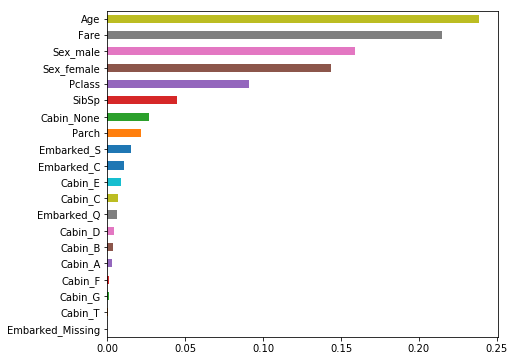

In [45]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
f_i = feature_importances.sort_values()
f_i.plot(kind="barh", figsize=(7,6));

we can remove the variables which hold least importance which will increase the accuracy and model will work faster

# PARAMETER OPTIMIZATION


### n_jobs determines if multiple processors should be used to train and test the model. n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.


In [46]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, Y)

4.78 s ± 343 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, Y)

5.33 s ± 323 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### n_estimators : the number of trees in the forest. Choose as high as possible

30 trees
c-stat:  0.8538704076524037

50 trees
c-stat:  0.8606983457429244

100 trees
c-stat:  0.8635211282608464

200 trees
c-stat:  0.8621922900755228

500 trees
c-stat:  0.863739494455629

1000 trees
c-stat:  0.8640430767264244

2000 trees
c-stat:  0.8634492271967107



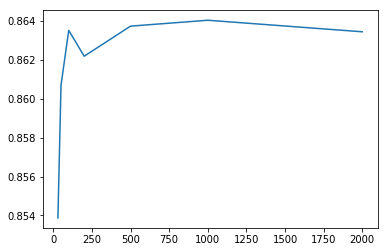

In [49]:
results = []
n_estimator_options = [30,50,100,200,500,1000,2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, Y)
    print(trees, "trees")
    roc = roc_auc_score(Y, model.oob_prediction_)
    print("c-stat: ", roc)
    results.append(roc)
    print("")
    
pd.Series(results, n_estimator_options).plot();

### max_features : the number of features to consider when looking for best split. Try "auto", "None", "sqrt", "log2", 0.9 and 0.2

auto options
c-stat:  0.8640430767264244

None options
c-stat:  0.8640430767264244

sqrt options
c-stat:  0.8633746631301995

log2 options
c-stat:  0.8633746631301995

0.9 options
c-stat:  0.8635344432727234

0.2 options
c-stat:  0.8633746631301995



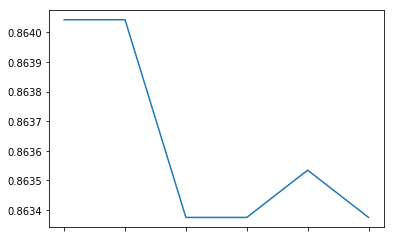

In [51]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, Y)
    print(max_features, "options")
    roc = roc_auc_score(Y, model.oob_prediction_)
    print("c-stat: ", roc)
    results.append(roc)
    print("")
    
pd.Series(results, max_features_options).plot();

### min_samples_leaf : minimum number of samples in newly created leaves


1 min_samples
c-stat:  0.8640430767264244

2 min_samples
c-stat:  0.8696540227313881

3 min_samples
c-stat:  0.8715713844416749

4 min_samples
c-stat:  0.87347809414246

5 min_samples
c-stat:  0.8742690058479532

6 min_samples
c-stat:  0.8740293356341673

7 min_samples
c-stat:  0.8733049989880591

8 min_samples
c-stat:  0.871866977705344

9 min_samples
c-stat:  0.8692945174107096

10 min_samples
c-stat:  0.8674304157479309



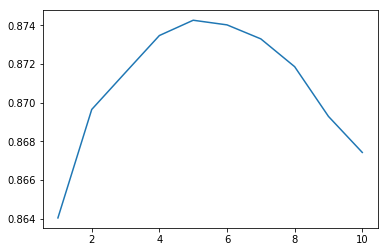

In [53]:
results = []
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9,10]

for min_samples_leaf in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto",
                                  min_samples_leaf=min_samples_leaf)
    model.fit(X, Y)
    print(min_samples_leaf, "min_samples")
    roc = roc_auc_score(Y, model.oob_prediction_)
    print("c-stat: ", roc)
    results.append(roc)
    print("")
    
pd.Series(results, min_samples_leaf_options).plot()

# Final Model

In [54]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(X, Y)
roc = roc_auc_score(Y, model.oob_prediction_)
print("c-stat: ", roc)

c-stat:  0.8742690058479532
